## Ejercicio MOP 01: Aplicación del método weighted-sum

$$
\begin{align}
	&\text{min }  && f_1(x)=-x_1+3.5x_2\\
	&\text{min }  && f_2(x)=2x_1-x_2\\
	&\text{s.t. }  && x_1   \le  20\\
	&  && x_2 \le  100\\
    &  && 5x_1+4x_2 \le 200\\
    & && x_1, x_2 \geq  0  \\
\end{align}
$$

In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt

x1=list()
x2=list()
f1=list()
f2=list()

def modelo(w1,w2):
    model = ConcreteModel()
    model.X1 = Var(within=NonNegativeReals)
    model.X2 = Var(within=NonNegativeReals)

    model.C1 = Constraint(expr = model.X1 <= 20)
    model.C2 = Constraint(expr = model.X2 <= 100)
    model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)

    model.f1 = Var()
    model.f2 = Var()
    model.C_f1 = Constraint(expr= model.f1 == -model.X1 +3.5*model.X2)
    model.C_f2 = Constraint(expr= model.f2 == 2*model.X1 -  model.X2)
    model.O_f1 = Objective(expr= w1*model.f1+w2*model.f2  , sense=minimize)
    solver = SolverFactory('glpk')
    solver.solve(model)
    return model.X1.value, model.X2.value,model.f1.value,model.f2.value


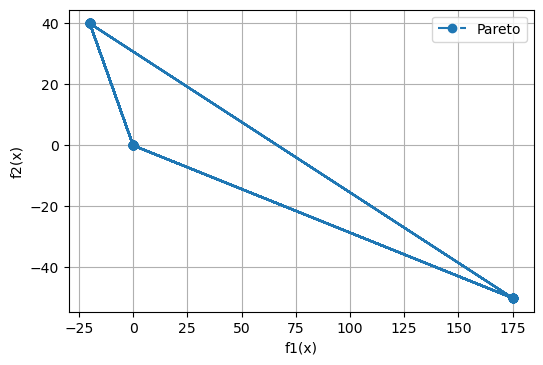

In [2]:
from random import random

for i in range(100):
    w1 = random()
    w2= 1-w1
    x1val,x2val,f1val,f2val =modelo(w1,w2)
    x1.append(x1val),x2.append(x2val),f1.append(f1val),f2.append(f2val)


fig, ax = plt.subplots()
fig.set_dpi(100)
ax.plot(f1,f2,'o-.', label='Pareto')

ax.set(xlabel='f1(x)', ylabel='f2(x)')
ax.legend()
ax.grid()